<a href="https://colab.research.google.com/github/rafaelos134/VI_EAFEXP_Proj3/blob/main/master.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import zipfile
import pandas as pd
  
# read the dataset using the compression zip
lightcurves_train = pd.read_csv('/content/drive/MyDrive/DataP03/plasticc_train_lightcurves.csv.gz',compression='gzip')
metadata_train = pd.read_csv('/content/drive/MyDrive/DataP03/plasticc_train_metadata.csv.gz',compression='gzip')
metadata_test = pd.read_csv('/content/drive/MyDrive/DataP03/plasticc_test_metadata.csv.gz',compression='gzip')
lightcurves_extra = pd.read_csv('/content/drive/MyDrive/DataP03/plasticc_lightcurves_extra.csv.gz',compression='gzip')

In [5]:
import matplotlib.pyplot as plt
import numpy as np

##Sorteia e plota uma curva de luz

<ipython-input-86-6b2c79d986db>:11: MatplotlibDeprecationWarning: Saw kwargs ['mfc', 'markerfacecolor'] which are all aliases for 'markerfacecolor'.  Kept value from 'markerfacecolor'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  plt.plot(x,y, '.', linestyle='solid',  mfc='none', mec='b', markersize=24, markerfacecolor='white')


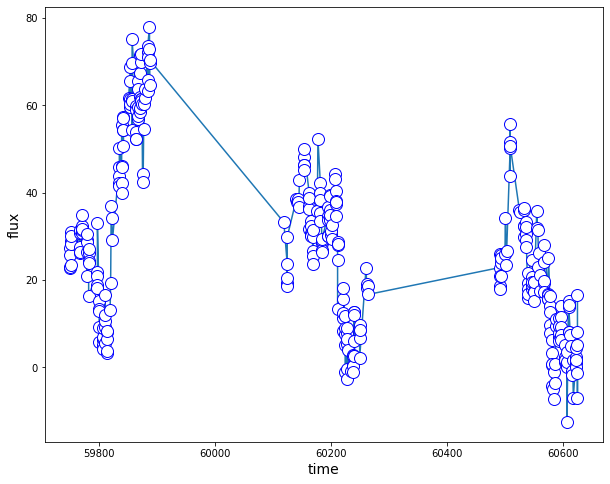

In [86]:
x = np.random.choice(metadata_train['object_id'],1)

id = lightcurves_train[np.array(lightcurves_train['object_id']) == x]

x = np.array(id['mjd'])
y = np.array(id['flux'])

plt.figure(figsize=(10,8))
plt.xlabel('time', fontsize=14)
plt.ylabel('flux', fontsize=14)
plt.plot(x,y, '.', linestyle='solid',  mfc='none', mec='b', markersize=24, markerfacecolor='white')

#converter a unidade de tempo 

##Distribuição das clases por quantidade de aparição


    unique_values  counts
11              6     151
4              15     495
3              16     924
1              42    1193
9              52     183
13             53      30
5              62     484
12             64     102
2              65     981
8              67     208
6              88     370
0              90    2313
7              92     239
10             95     175


Text(0, 0.5, 'count')

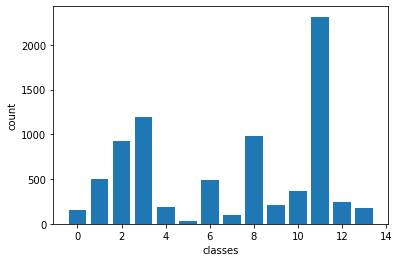

In [96]:
classes = metadata_train["target"].value_counts().rename_axis('unique_values').reset_index(name='counts').sort_values(by='unique_values')
counts=[]

print(classes)
plt.bar(range(len(classes['unique_values'])),classes['counts'])
plt.xlabel('classes')
plt.ylabel('count')


##Distribuição de filtros por por quantidade de aparição

   unique_values  counts
4              0  197493
5              1  176499
2              2  238049
3              3  233520
1              4  277119
0              5  299025


Text(0, 0.5, 'counts ')

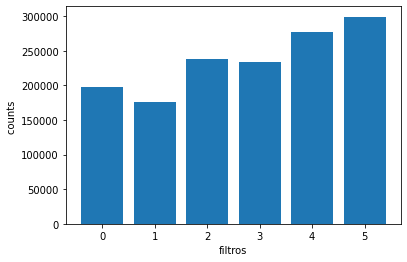

In [95]:
filtros = lightcurves_train["passband"].value_counts().rename_axis('unique_values').reset_index(name='counts').sort_values(by='unique_values')

counts=[]

print(filtros)
plt.bar(range(len(filtros['unique_values'])),filtros['counts'])
plt.xlabel('filtros')
plt.ylabel('counts ')




      unique_values  counts
0               615     352
1279            713     350
1610            730     330
907             745     351
513            1124     352
...             ...     ...
2593      130739978     147
6789      130755807     114
4341      130762946     134
2867      130772921     144
6313      130779836     118

[7848 rows x 2 columns]


Text(0, 0.5, 'counts ')

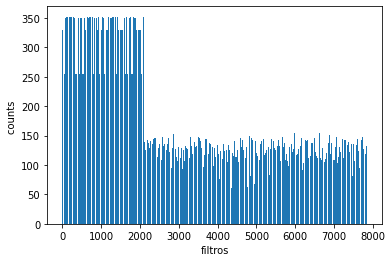

In [97]:
pontos = lightcurves_train["object_id"].value_counts().rename_axis('unique_values').reset_index(name='counts').sort_values(by='unique_values')

counts=[]

print(pontos)
plt.bar(range(len(pontos['unique_values'])),pontos['counts'])
plt.xlabel('filtros')
plt.ylabel('counts')
